In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import datetime as dt
import yfinance as yf
import statsmodels.api as sm

plt.style.use("ggplot")

# <font face="gotham" color="purple"> Why so Many Risk Measurements?</font> 

For single assets, such as bond, you have convexity and duration to measure the risk, for options you have delta and gamma, now we turn to portfolio view, Value-at-Risk the the most fundamental approach for portfolio risk modeling. 

## <font face="gotham" color="purple"> Mean-Variance Framework </font> 

Invented by Markowitz, it assumes daily return obey a normal distribution, however in real world, financial assets return tend to have skewed or heavier tails, the normality assumption might be inappropriate due to misleading estimates of risks from mean-variance framework. To emphasize, the standard deviation as a risk measurement is _not_ appropriate for non-normal distributions.

# <font face="gotham" color="purple"> Notes on Returns and Volatility</font> 

## <font face="gotham" color="purple"> Defect of Simple Return </font> 

This is simples returns as we have seen. But we didn't explicitly expain why it might inproper for time series modelling. 

$$
r_{t}=\frac{P_{t}}{P_{t-1}}-1=\frac{P_{t}-P_{t-1}}{P_{t-1}}
$$

Because $P\geq 0$, the worst situation that $P_t=0$, therefore $r_t = \frac{0}{P_{t-1}}-1=-1$, in distribution-wise, we have to work with a trunkated distribution cut off from $-1$, this is not ideal when we need to use normal or other continuous distribution.

This can be corrected by using log return which covers the whole $[-\infty, \ \infty]$.

## <font face="gotham" color="purple"> Volatility Estimation </font> 

Here we list some common ways to estimating return volatility.

### <font face="gotham" color="purple"> Sample Variance </font> 

The simplest way to estimate volatility is just to calculate a rolling window of sample variance such as
$$
\sigma_t^2=\sqrt{\frac{1}{m-1} \sum_{i=1}^m\left(r_{t-i}-\bar{r}\right)^2} \qquad \text{or, simplified as }\qquad \sigma_{t}^2=\frac{1}{{m}} \sum_{i=1}^{{m}} {r}_{{t}-{i}}^2
$$
where $\sigma_t$ is the standard deviation today, $m$ is the length of rolling window, $\bar{r}$ is the mean return over $m$ previous days. 

The shortcoming of this approach is that it assigns equal weight onto each historical observation.

### <font face="gotham" color="purple"> Exponential Weight volatility </font> 

This model estimate tomorrow's volatility based on the weighted average of today's volatility and return, $\lambda$ is usually in range $[0.9,\  0.99]$.

$$
\sigma_{t+1}^2=(1-\lambda) r_{t}^2+\lambda \sigma_{t}^2
$$
We will see its application later below.

### <font face="gotham" color="purple"> GARCH(1,1) </font> 

A GARCH(1,1) model is defined as following
$$
\sigma_{t+1}^2=(1-\alpha-\beta) V_L+\alpha r_{t}^2+\beta \sigma_{t}^2
$$
where $V_L$ is the long run mean variance rate, given conditions $\alpha+\beta\leq 1$, if $\alpha+\beta >1$ the GARCH process is unstable, $\alpha+\beta =1$ means no mean reversion feature, which is exact the case of exponential weight volatility described above.

### <font face="gotham" color="purple"> Correlation Estimation </font> 

Covariance can be estimated with EW method too
$$
\operatorname{cov}_{t+1}=\lambda \operatorname{cov}_{t}+(1-\lambda) x_{t} y_{t}
$$

### <font face="gotham" color="purple"> Implied Volatility</font> 

Textholder

# <font face="gotham" color="purple"> Definition of Value-at-Risk</font> 

In a boarder view, there are four major risks in finance, credit risk, operational risk, liquidity risk and market risk. 

Value-at-Risk (VaR) is one of the most popular tool for analyzing market risks. 

There are two ways to expressing a VaR, for instance if a one-day $99\%$ VaR is $100,000$. We can say
1. We are $99\%$ confident that maximum one-day loss will not surpass $100, 000$. (Using confidence level)
2. There is a $1\%$ chance that the loss will surpass $100, 000$ or more. (Using significance level)

Mathematically, the VaR for $k$-day ahead return, assuming normally distributed with $0$ mean and $\sigma_{t+K}$ is expressed by
$$
\operatorname{Pr}\left(R_{t, t+K}<-\text{VaR}_{t+K}^p\right)=p
$$
where $R_{t, t+K}$ is the total log return over $K$ trading periods (usually days).
$$
R_{t, t+K}=\sum_{k=1}^K R_{t+k}=\ln \left(S_{t+K}\right)-\ln \left(S_t\right)
$$
$-\text{VaR}_{t+K}^p$ means with significance level $p$, the Value-at-Risk _rate_ over next $K$ days.

Note that if we specify $\$\text{VaR}$, then it is a dollar unit VaR, otherwise it will be a rate.

## <font face="gotham" color="purple"> One-Period Ahead Normal Absolute VaR</font> 

Now we just focus on one period head VaR
$$
\operatorname{Pr}\left(R_{t, t+1}<-\text{VaR}_{t+1}^p\right)=p
$$

Devided by $\sigma_{t+1}$ and normalized the $R_{t,t+1}$
$$
\begin{aligned}
\operatorname{Pr}\left(\frac{R_{t, t+1}-\mu}{\sigma_{ t+1}}<-\frac{\operatorname{VaR}_{t+1}^p}{\sigma_{t+1}}\right) & =p, \qquad \text{assuming }\mu=0\\
\operatorname{Pr}\left(z_{t+1}<-\frac{\operatorname{VaR}_{t+1}^p}{\sigma_{ t+1}}\right) & =p \\
\Phi\left(-\frac{\operatorname{VaR}_{t+1}^p}{\sigma_{ t+1}}\right) & =p
\end{aligned}
$$
where $\Phi(\cdot)$ is an accumulative normal distribution.


And what is $\Phi^{-1}(\cdot)$?

It is a quantile function, $\Phi^{-1}(p)$, also we implicitly used the $\mu=0$ in standard normal distribution
$$
\text{VaR}_{t+1}^p =\underbrace{\mu -\sigma_{t+1}\Phi^{-1}(p)}_{\text{absolute VaR}} =  -\sigma_{t+1}\Phi^{-1}(p) = -\sigma_{t+1}z_{\alpha}
$$
where $z_{p} = \Phi^{-1}(p)$, you might see this notation in some other references, also with a drift term $\mu\neq 0$, it is often called **absolute VaR** in acadmeic literatures, in contrast with $\mu=0$ is called **relative VaR**, however when we are using daily returns, $\mu\approx0$, both ways are approximately equivalent. 

This is also called the **parametric approach to VaR**.

So what is $p$? It is the significance level as we mentioned, we can choose it to be $0.01$. Then $\Phi^{-1}(0.01)\approx -2.33$. Calculate $\sigma_{t+1}$ based on historical data, say daily volatility $0.034$ (I know, it's huge, but humor me), then we obtain one-day head $\text{VaR}(99\%)$.

$$
\begin{aligned}
\operatorname{VaR}_{t+1}^{0.01} & =-\sigma_{ t+1} \Phi^{-1}(0.01) \\
& =-0.034(-2.33) \\
& =0.0792
\end{aligned}
$$

So how to interpret this outcome? 

Based on the significancel level $0.01$, there is a $0.01$ chance of losing more than $0.0792$ of portfolio value by the end of tomorrow. Alternatively, we are $0.99$ confident that the loss will not exceed $0.0792$.

## <font face="gotham" color="purple"> K-Period Ahead Normal Absolute VaR</font> 

Often than not we would like to calulate a longer period of VaR, therefore we need to scale the one period formula into a $K$-period one.

$$
\text{VaR}_{t+K}^p =\underbrace{\mu\Delta K -\sigma_{t+1}\Phi^{-1}(p)\sqrt{\Delta K}}_{\text{absolute K-period VaR}} 
$$
where the $\sqrt{\Delta K}$ comes from the properties of variance $\sqrt{\operatorname{Var}(\Delta K \varepsilon)} = \sqrt{\Delta K} \sigma(\varepsilon)$.

For example, here's what we know, daily mean return is $0.0002$, dailiy volatility is $0.008$, trading days in a year is $252$, what's the absolute $\text{VaR}$ with confidence level at $99\%$.

In [2]:
def calAbsVaR(daily_return, periods, daily_vol, sig_level):
    """
    Return an absolute VaR of K periods scaled on daily statistics.
    """
    return -(
        daily_return * periods
        - daily_vol * sp.stats.norm(0, 1).ppf(1 - sig_level) * np.sqrt(periods)
    )

In [3]:
calAbsVaR(daily_return=0.0002, periods=252, daily_vol=0.008, sig_level=0.01)

0.24503702101132213

What if volatility goes up? Say $0.03$.

In [4]:
calAbsVaR(daily_return=0.0002, periods=252, daily_vol=0.03, sig_level=0.01)

1.057488828792458

It literally means we are $99\%$ confident that your porfolio's loss will not exceed $105.75\%$ within a year.

## <font face="gotham" color="purple"> Lognormal VaR</font> 

To resolve the boundary issue of normal VaR, we sometimes transform it to lognormal VaR. In the case of lognormal VaR, we explicitly assume log return follows a normal distribution
$$
R_t = \log{\left(\frac{P_t}{P_{t-1}}\right)}\sim N(\mu, \sigma^2)
$$
Therefore using definition of lognormal distribution
$$
P_{t}=P_{t-1}e^{R_{t}}\sim LogN(\mu, \sigma^2)
$$

The lognormal VaR is defined as
$$
\text{VaR} = P_{t-1} \exp{\left(\mu\Delta K -\sigma_{t}\Phi^{-1}(p)\sqrt{\Delta K}\right)}
$$

Again, as an example, daily mean return is $0.0002$, dailiy volatility is $0.008$, trading days in a year is $252$, what's the absolute $\text{VaR}$ with confidence level at $99\%$.

In [5]:
def calAbsLogVaR(daily_return, periods, daily_vol, sig_level):
    """
    Return an absolute lognormal VaR of K periods scaled on daily statistics.
    """
    mu = daily_return * periods
    sigma = daily_vol * np.sqrt(periods)
    return 1 - np.exp(mu - sigma * sp.stats.norm(0, 1).ppf(1 - sig_level))

The input is actually the same as the normal VaR example, we can compare the results.

In [6]:
calAbsLogVaR(daily_return=0.0002, periods=252, daily_vol=0.03, sig_level=0.01)

0.6526730865275543

## <font face="gotham" color="purple"> Convert Rate to Dollar Unit</font> 

If the portfolio value is $\$200,000$, the Expected Loss is obtained by
$$
\$\text{VaR} = V(1-e^{-\text{VaR}})
$$
where $V$ is the value of portfolio.

The $\$\text{VaR}$ is simply

In [7]:
200000 * (1 - np.exp(-0.0792))

15228.973012047154

In [8]:
200000 * 0.0792

15840.000000000002

Thera are several strong assumptions for what we have discussed.

1. It didn't say the worst case in those $1\%$
2. It assumes portfoilo remain the same over $K$ period, if $K=1$ then there won't be problems.
3. $K$ and $p$ are chosen arbitrarily.


## <font face="gotham" color="purple"> Load Data </font> 

In [9]:
def getData(stocks, start_date, end_date, column="Close", dropna=True):
    # dropna decides if you want to drop all NaN values, column for instance ['Close']
    try:
        if isinstance(stocks, list):
            stock_data = {}
            for stock in stocks:
                ticker = yf.Ticker(stock)
                stock_data[stock] = ticker.history(start=start_date, end=end_date)
                stock_data[stock] = stock_data[stock][column]
            if dropna == True:
                df = pd.DataFrame(stock_data).dropna()
            else:
                df = pd.DataFrame(stock_data)

        return df
    except:
        print('Tickers should be contained in a list, for instance, ["LULU"]')

In [10]:
stocks = ["LULU", "MMM", "NVDA", "JNJ", "NFLX"]
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=5000)

In [11]:
df = getData(stocks, start_date, end_date)

In [12]:
df.head(3)

,LULU,MMM,NVDA,JNJ,NFLX
Date,,,,,
2009-06-12 00:00:00-04:00,7.115,41.095131,2.640832,37.500423,5.405714
2009-06-15 00:00:00-04:00,6.915,39.956604,2.597239,36.624126,5.451429
2009-06-16 00:00:00-04:00,6.495,39.350273,2.526113,36.537159,5.404286


Get log return.

In [13]:
df_returns = df.pct_change().dropna()
df_log_returns = (np.log(df).diff()).dropna()

Assume an arbitrary weight without optimization (can be optimized to obtain optimal risky portfolio). Then calculate portfolio return.

Randomize a weight vector.

In [14]:
weights = np.random.rand(len(stocks))
weights = weights / np.sum(weights)

# create a column of portfolio return with randomized weight
df_log_returns["portfolio"] = df_log_returns.dot(weights)

In [15]:
df_log_returns.head()

,LULU,MMM,NVDA,JNJ,NFLX,portfolio
Date,,,,,,
2009-06-15 00:00:00-04:00,-0.028512,-0.028096,-0.016645,-0.023645,0.008421,-0.023056
2009-06-16 00:00:00-04:00,-0.062660,-0.015291,-0.027767,-0.002377,-0.008685,-0.034940
2009-06-17 00:00:00-04:00,0.011481,0.010728,0.024227,0.010563,0.065727,0.016417
2009-06-18 00:00:00-04:00,0.006826,0.004563,-0.019696,0.010632,0.022275,0.000042
2009-06-19 00:00:00-04:00,0.014259,0.001011,0.010792,0.005363,0.006755,0.010118


## <font face="gotham" color="purple">Historical Simulation and Weighted Simulation</font> 

Like we said before, portfolio holdings are dynamic, to simplify the problem we usually use today's holding to simulative yesterdays' portfolio value, that is 
$$
V_{ t-1}=\sum_{i=1}^n N_{i, t} S_{i, t-1}
$$
where $V$ is the portfolio value and $N_i,t$ is the units of assets $i$, $S_{i,t}$ is the price of asset $i$ at $t$. We can call it _pseudo value_, in that sense, _pseudo log return_ of portfolio is
$$
R_{ t}=\ln \left(\frac{V_{ t}}{  V_{ t-1}}\right)
$$

A realization (a time series) from stochastic process of $\{R_{t+1-\tau}\}^m_{\tau=1}$ can be plotted by a histogram.

And choose a $\text{VaR}^p_{t+1}$ that $p$ of observations are smaller than  $\text{VaR}^p_{t+1}$, is expressed by a percentile operator form

$$
\operatorname{VaR}_{t+1}^p=-\text { Percentile }\left(\left\{R_{P F, t+1-\tau}\right\}_{\tau=1}^m, p\right)
$$

It is intuitive and requires no modelling process, but how to choose $m$ which is also a parameter. 

If $m$ is too large, it makes no sense that old historical figures can say anything about today, because this process gives equal weight of every observation.

Many people treat $m$ as a constant, it makes sense to be a constant, but the calculationg of VaR should be a rolling window of $m$, which makes $\text{VaR}$ a time series as well like the first Risk Metrics example. 

To some extent, it's not really a simulation, but rather plotting a histogram of returns. The fastest approach is to use all the obserations for calculating the VaR, meaning treating VaR like a constant.

In [16]:
def historicalSimuVaR(returns, alpha):
    """
    alpha is sigificance level
    """
    return np.percentile(returns, alpha)

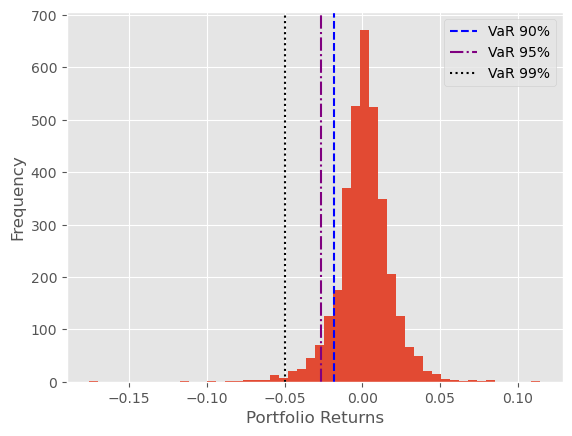

In [17]:
VaR_90 = historicalSimuVaR(df_log_returns["portfolio"], 10)
VaR_95 = historicalSimuVaR(df_log_returns["portfolio"], 5)
VaR_99 = historicalSimuVaR(df_log_returns["portfolio"], 1)

fig, ax = plt.subplots()
ax.hist(df_log_returns["portfolio"], bins=50)
ax.set_xlabel("Portfolio Returns")
ax.set_ylabel("Frequency")
ax.axvline(VaR_90, color="blue", ls="--", label="VaR 90%")
ax.axvline(VaR_95, color="purple", ls="dashdot", label="VaR 95%")
ax.axvline(VaR_99, color="black", ls="dotted", label="VaR 99%")
ax.legend()
plt.show()

However, this is too much simplification, quite useless to some extent. Historical Simulation assumes importance of data the same for each observation, however as you can imagine, the observation from $3$ years ago won't be as important as yesterday's.

The better way is to treat VaR as a stochastic process as well, and pick a rolling window for VaR, calculating a series of VaRs. We can show this approach together with **Weight Historical Simulation**.

In [18]:
df_log_returns["pf_loss"] = -df_log_returns["portfolio"]
df_log_returns["VaR_HS"] = np.nan
df_log_returns["VaR_WHS"] = np.nan

Today's weight is $\eta_1$, yesterday's $\eta_2$, $\eta$ is the weight parameter determining how much weight you want to assign to the most recent data, the higher the less weight on most recent ones, emperically it is set in range $[.90, .99]$.

$$
\eta_\tau=\left\{\frac{\eta^{\tau-1}(1-\eta)}{1-\eta^m}\right\}_{\tau=1}^m
$$

In [19]:
# HS and WHS
p = 1
window = 200
eta = 0.95
weights = eta ** (np.arange(window, 0, -1) - 1) * (1 - eta) / (1 - eta**window)

In [20]:
df_log_returns = df_log_returns.copy()

In [21]:
for i in range(window + 1, len(df_log_returns)):
    rolling_window_data = df_log_returns.iloc[i - window : i - 1]["portfolio"]
    df_log_returns.iloc[i]["VaR_HS"] = -np.percentile(rolling_window_data, p)

    weights_sorted = weights[np.argsort(-rolling_window_data)]
    df_log_returns.iloc[i]["VaR_WHS"] = np.sort(-rolling_window_data)[
        np.min(np.where(weights_sorted.cumsum() > 0.90))
    ]

<AxesSubplot:xlabel='Date'>

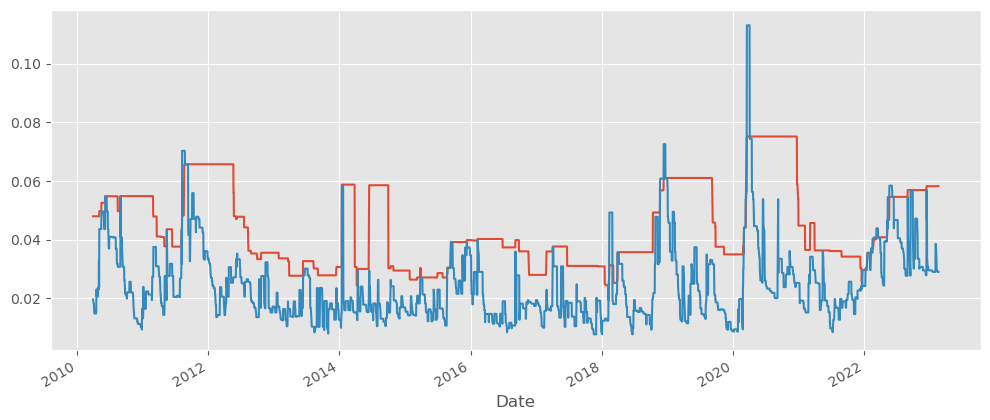

In [120]:
fig, ax = plt.subplots(figsize=(12, 5))
df_log_returns["VaR_HS"].plot(ax=ax)
df_log_returns["VaR_WHS"].plot(ax=ax)

As you can see, the WHS is more sensitive than HS. In general VaR HS method suffer from "ghost effect", such as sudden seemingly unjustified jumps, the longer the window, the slower ghost effects to disappear. 

An alternative method in WHS's window setting is to expand the window rather than rolling window, in this case we preserve all the information.

## <font face="gotham" color="purple">VaRs with RiskMetrics Approach</font> 

RiskMetrics pick market price variance right away from a GARCH(1,1) process.

In [23]:
df_log_returns["sigma2"] = np.nan
df_log_returns = df_log_returns.copy()

Set initial value of variance as the unconditional variance of whole sample.

In [24]:
p = 1
window = 250
df_log_returns.iloc[0]["sigma2"] = np.var(df_log_returns["portfolio"])

Generating volatility based on a GARCH(1, 1) process propsed by J.P. Morgen's RiskMetrics.
$$
\sigma_{ t+1}^2=0.94 \sigma_{ t}^2+0.06 R_{ t}^2
$$

In [25]:
theta1 = 0.94
theta2 = 0.06
for i in range(len(df_log_returns) - 1):
    # iterate from index 1, because value at index 0 is assigned to 0
    df_log_returns.iloc[i + 1]["sigma2"] = (
        theta1 * df_log_returns.iloc[i]["sigma2"]
        + theta2 * df_log_returns.iloc[i]["portfolio"] ** 2
    )

$K$-day $p\%$ VaR is computed by
$$
\operatorname{VaR}_{t+1}^p=-\sigma_{ t+1} \Phi^{-1}(p)\sqrt{K}
$$

In [26]:
sig_level = 0.01
K = 1
df_log_returns["VaR_RiskMetrics"] = (
    -np.sqrt(df_log_returns["sigma2"]) * sp.stats.norm(0, 1).ppf(sig_level) * np.sqrt(K)
)

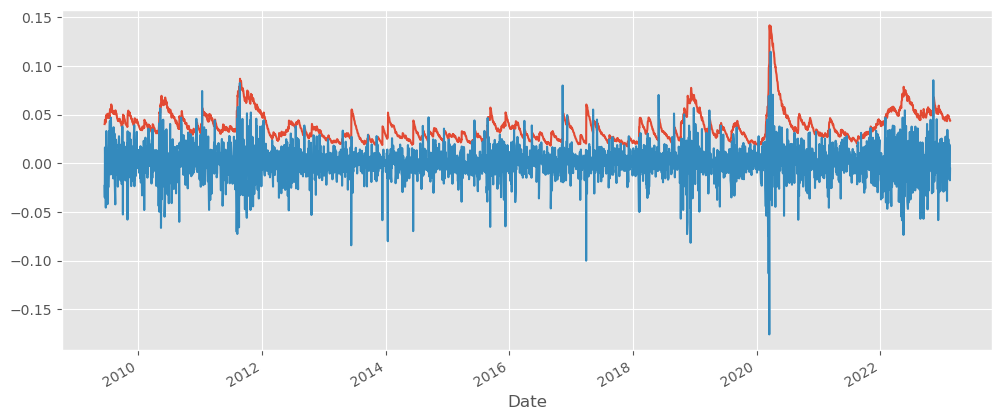

In [121]:
fig, ax = plt.subplots(figsize=(12, 5))
df_log_returns["VaR_RiskMetrics"].plot(ax=ax)
df_log_returns["portfolio"].plot(ax=ax)
plt.show()

The plots shows RiskMetrics VaR that tells the percentage of capital would be lost over $d$-day period in $1\%$ chances.

$$
\$ P_{t+1} \times \text{VaR}_{t+1, t+K} \leq M
$$
where $M$ is the limit dollar amount you portfolio afford to lose and $P$ the total position.

Take this rule as a strategy to adjust your positions.

In [28]:
df_log_returns.tail(3)

,LULU,MMM,NVDA,JNJ,NFLX,portfolio,pf_loss,VaR_HS,VaR_WHS,sigma2,VaR_RiskMetrics
Date,,,,,,,,,,,
2023-02-15 00:00:00-05:00,0.016587,0.005066,-0.009052,-0.016615,0.004048,0.001197,-0.001197,0.05821,0.028973,0.000382,0.045482
2023-02-16 00:00:00-05:00,-0.010509,-0.011452,-0.034047,-0.007116,-0.030081,-0.017328,0.017328,0.05821,0.028973,0.000359,0.044102
2023-02-17 00:00:00-05:00,-0.004578,0.008800,-0.028303,0.020662,-0.007872,-0.005440,0.005440,0.05821,0.028973,0.000356,0.043884


In [29]:
# the amount of portfolio you can afford to lose
M = 1e5

# adjust positions according to VaR
df_log_returns["position_HS"] = M / df_log_returns["VaR_HS"]
df_log_returns["position_WHS"] = M / df_log_returns["VaR_WHS"]
df_log_returns["position_RM"] = M / df_log_returns["VaR_RiskMetrics"]

Convert to dollar amount
$$
\$\text{VaR} = V(1-e^{-\text{VaR}})
$$

In [30]:
df_log_returns["dollar_return_HS"] = df_log_returns["position_HS"] * (
    1 - np.exp(-df_log_returns["portfolio"])
)
df_log_returns["dollar_return_WHS"] = df_log_returns["position_WHS"] * (
    1 - np.exp(-df_log_returns["portfolio"])
)
df_log_returns["dollar_return_RM"] = df_log_returns["position_RM"] * (
    1 - np.exp(-df_log_returns["portfolio"])
)

In [31]:
df_log_returns = df_log_returns.copy()
df_log_returns["cumulative_dreturn_HS"] = df_log_returns["dollar_return_HS"].cumsum()
df_log_returns["cumulative_dreturn_WHS"] = df_log_returns["dollar_return_WHS"].cumsum()
df_log_returns["cumulative_dreturn_RM"] = df_log_returns["dollar_return_RM"].cumsum()

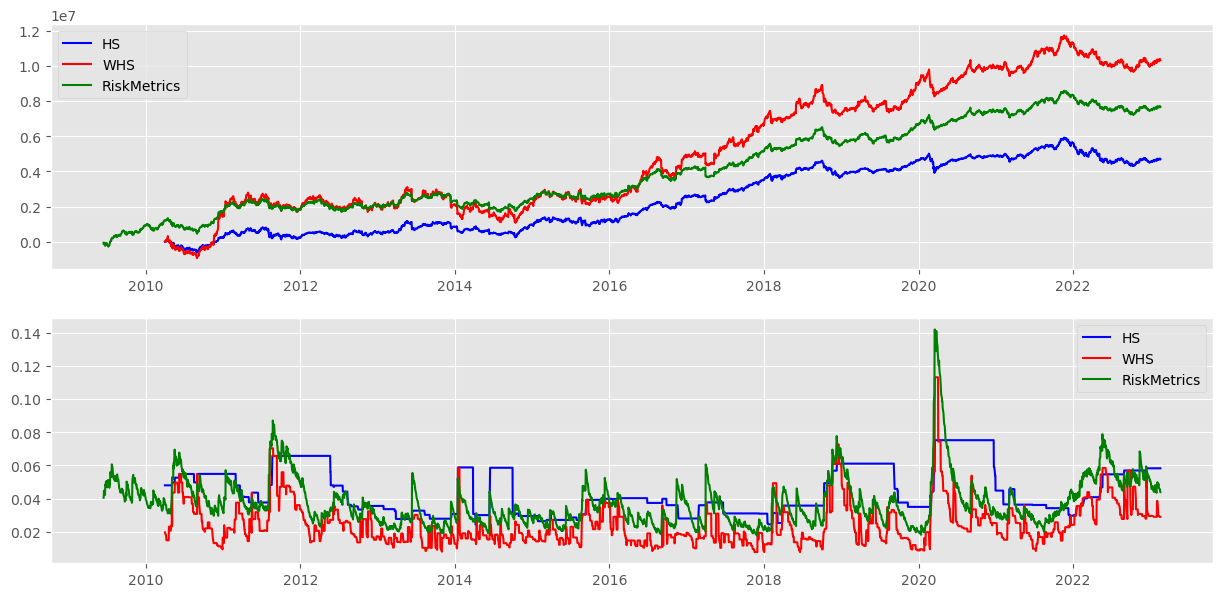

In [32]:
fig, ax = plt.subplots(figsize=(15, 7), ncols=1, nrows=2)
ax[0].plot(df_log_returns["cumulative_dreturn_HS"], label="HS", color="blue")
ax[0].plot(df_log_returns["cumulative_dreturn_WHS"], label="WHS", color="red")
ax[0].plot(df_log_returns["cumulative_dreturn_RM"], label="RiskMetrics", color="green")
ax[0].legend()

ax[1].plot(df_log_returns["VaR_HS"], label="HS", color="blue")
ax[1].plot(df_log_returns["VaR_WHS"], label="WHS", color="red")
ax[1].plot(df_log_returns["VaR_RiskMetrics"], label="RiskMetrics", color="green")
ax[1].legend()

plt.show()

## <font face="gotham" color="purple"> Exponential Spectral Risk Measures</font> 

## <font face="gotham" color="purple"> Hull and White Method</font> 

$$
\frac{r_{t, i}^*}{\sigma_{T, i}}=\frac{r_{{t},  {i}}}{\sigma_{t, i}}
$$

Combining HS with GARCH.

## <font face="gotham" color="purple"> Extreme Value Theory</font> 

Generalized Extreme Value accumulative distribution take form of

$$
{{F}(x)}=\left\{\begin{array}{l}
\exp \left[-\left(1+\xi \frac{x-u}{\sigma}\right)^{-\frac{1}{\xi}}\right], \xi \neq 0 \\
\exp \left[-\exp \left(-\frac{x-\mu}{\sigma}\right)\right], \xi=0
\end{array}\right.
$$

where $\mu$ and $\sigma$ represents the mean and standard deviation of the limiting distribution, $\xi$ the tail index, gives an indication of the shape of tail of the limiting distribution.

* When $\xi>0$ : Fréchet distribution, heavy tails, like t-dist, Pareto dist.
* When ${\xi}={0}:$ Gumbel distribution, light tails, like normal or lognormal dist.
* When ${\xi}<{0}$ : Weibull distribution, very light tails, not useful for modelling financial returns.

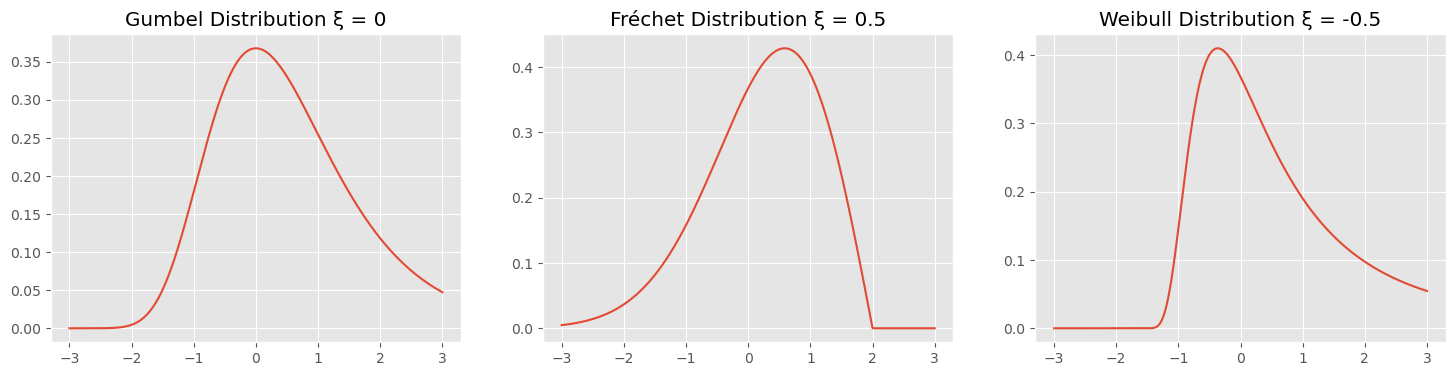

In [179]:
x = np.linspace(-3, 3, 1000)
loc = 0.0
scale = 1.0

gumbel = genextreme(c=0, loc=loc, scale=scale)
frechet = genextreme(c=0.5, loc=loc, scale=scale)
weibull = genextreme(c=-0.5, loc=loc, scale=scale)

pdf_gumbel = gumbel.pdf(x)
pdf_frechet = frechet.pdf(x)
pdf_weibull = weibull.pdf(x)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

axs[0].plot(x, pdf_gumbel)
axs[1].plot(x, pdf_frechet)
axs[2].plot(x, pdf_weibull)

axs[0].set_title("Gumbel Distribution ξ = 0")
axs[1].set_title("Fréchet Distribution ξ = 0.5")
axs[2].set_title("Weibull Distribution ξ = -0.5")

plt.show()

$$
f(x, c) = \exp(-(1-c x)^\frac{1}{c}) (1-c x)^{\frac{1}{c-1}}
$$
where $-\infty < x \le 1/c$ if $c > 0$ and $1/c \le x < \infty$ if $c < 0$

In [132]:
A = sp.stats.norm(0, 1).rvs((5000, 1000))

In [184]:
A_max = np.max(A, axis=1)
A_max = {"EV BMM": A_max}

A_thresh = A[A >= 4]
A_thresh = {"EV POT": A_thresh}

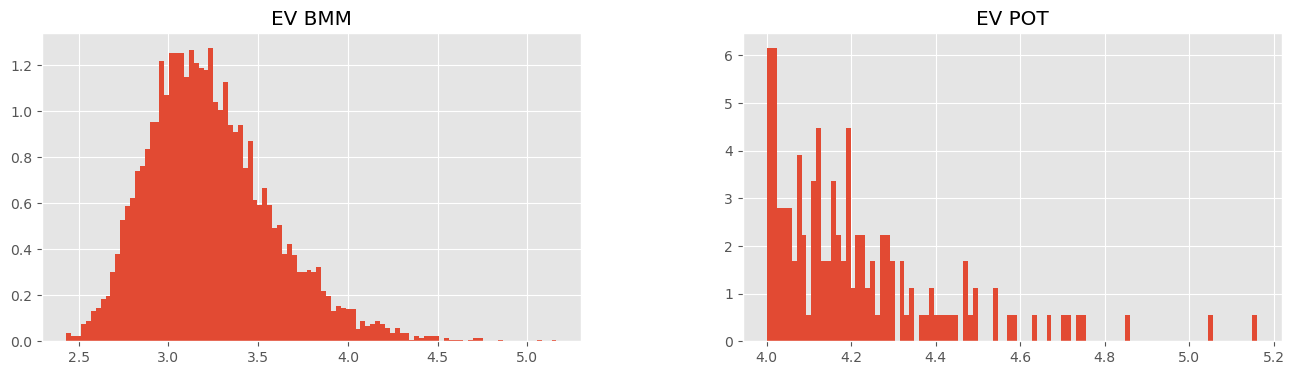

In [185]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2, nrows=1)
pd.DataFrame(A_max).hist(bins=100, density=True, ax=ax[0])
pd.DataFrame(A_thresh).hist(bins=100, density=True, ax=ax[1])
plt.show()

Peaks over threshold.

## <font face="gotham" color="purple">Peaks-over-Threshold</font> 

Generalized Pareto distribution

$$
F(x)=\left\{\begin{array}{l}
1-\left(1+\frac{\xi x}{\beta}\right)^{-\frac{1}{\xi}}, \xi \neq 0 \\
1-\exp \left(-\frac{x}{\beta}\right), \xi=0
\end{array}\right.
$$

- $\beta$ : a positive scale parameter
- $\xi$: a tail index parameter

The expression for VaR and expected shortfall using POT parameters is given as follows:
$$
\begin{gathered}
 {VaR}={u}+\frac{\beta}{\xi}\left\{\left[\frac{{n}}{{N}_u}(1-\alpha)\right]^{-\xi}-1\right\} \\
 {ES}=\frac{\operatorname{VaR}}{1-\xi}+\frac{\beta-\xi u}{1-\xi}
\end{gathered}
$$

$$
\begin{aligned}
& \xi=\text { shape parameter } \\
& \beta=\text { scale parameter } \\
& {u}=\text { threshold } \\
& {n}=\text { number of observations } \\
& {\alpha}=\text { confidence level} \\
& {N}_{{u}}=\text { number of observations that exceed threshold }
\end{aligned}
$$

$u$ the higher the better, but still a trade-off with enough excess-threshold observations.

# <font face="gotham" color="purple">Backtesting of VaR</font> 

Backtesting of VaR is essentially the hypothesis testing of VaR. 

For instance, the you have calculated one-day VaR(99%) to be $1$ million dollars, but last year there is $10$ days lost more than $1$ million, so is your calculation solid?

Not really, your VaR(99%) means there will be only $1\%$ of trading days lost more than $1$ million that is $252\times 1\% \approx 2.5$ days.

The number of days exceeding the calculated VaR is called exceptions, which can't be either too high or too low.

## <font face="gotham" color="purple"> Binomial Test</font> 

The number of exceptions $x$ follows a binomial distribution
$$
f(x)=C_N^x p^x(1-p)^{N-x}
$$

z-score of binomial test is
$$
\begin{aligned}
{z}=\frac{{x}-{Np}}{\sqrt{{Np}(1-{p})}} \approx {N}(0,1)
\end{aligned}\\
H_0:\text{VaR under test is true}\\
H_1:\text{VaR under test is false}
$$

- $N$ is the number of observations.
- $p=1-\text{VaR}$  is the probability of observing a failure if the model is correct.
- $x$ is the number of failures.

If the failures are independent, then the number of failures is distributed as a binomial distribution with parameters $N$ and $p$. 

The expected number of failures is $Np$ and the standard deviation of the number of failures is $\sqrt{N p(1-p)}$.

### <font face="gotham" color="purple"> Binomial Test Example</font> 

In 2020, stock A fell short of the downside $(99 \%$ VaR) band on $12$ days, or more than $1 \%$ of the time. $7$ of these $12$ occurrences fell within the August to October period.
$$
{z}=\frac{{x}-{Np}}{\sqrt{{Np}(1-{p})}}=\frac{12-252\times 0.01}{\sqrt{252\times0.01(1-0.01)}}\approx 6>2.5758
$$
We reject the hypothesis that the VaR model is true.

But where is $2.5758$ from? It is the percentile point function at $99.5%$, due to a two-tail test, so split $1\%$ on each side.

In [224]:
def calVaRBinTest(x, N, p):
    """
    Return a z-score of VaR binomial test.
    x: the number of failures.
    N: the number of observations.
    p: probability of observing failures if the VaR is correct
    """
    z = (x - N * p) / (np.sqrt(N * p * (1 - p)))
    print("z-score of VaR binomial test: {:.4f}".format(z))

    crit_value = sp.stats.norm(0, 1).ppf(1 - p / 2)
    if z > crit_value:
        print(
            "Reject null hypothesis that VaR is true, critical value: {}.".format(
                crit_value
            )
        )
    else:
        print(
            "Fail to reject null hypothesis that VaR is true, critical value: {}.".format(
                crit_value
            )
        )
    return z

In [223]:
z = calVaRBinTest(x=12, N=252, p=0.01)

z-score of VaR binomial test: 6.0019
Reject null hypothesis that VaR is true, critical value: 2.5758293035489004.


## <font face="gotham" color="purple"> Kupiec Test</font> 

$$
\mathrm{LR}_{\mathrm{uc}}=-2 \ln \left[(1-{p})^{N-{x}} {p}^{x}\right]+2 \ln \left\{[1-(x / N)]^{N-x}(x /N)^{x}\right\}
$$
- $p$ : the probability of failures if the model is true
- $x$ : the number of failures
- $N$ : the number of observations

This is a likelihood ratio test.

## <font face="gotham" color="purple"> Christoffersen Test</font> 

### <font face="gotham" color="purple"> Basel Committee Rules</font> 

VaR should be calculated at $99\%$, i.e. we expect $2.5$ failures each year. 
$$

$$

# <font face="gotham" color="purple"> VaR Mapping</font> 

Mapping is the process by which the current values of the portfolio positions are replaced by exposures on the risk factors.

## <font face="gotham" color="purple"> QQ Plot </font> 

In [ ]:
N

In this example, the return of LULU, the largest values are larger (more extreme) than would be expected, and smallest values are smaller than would be expected.

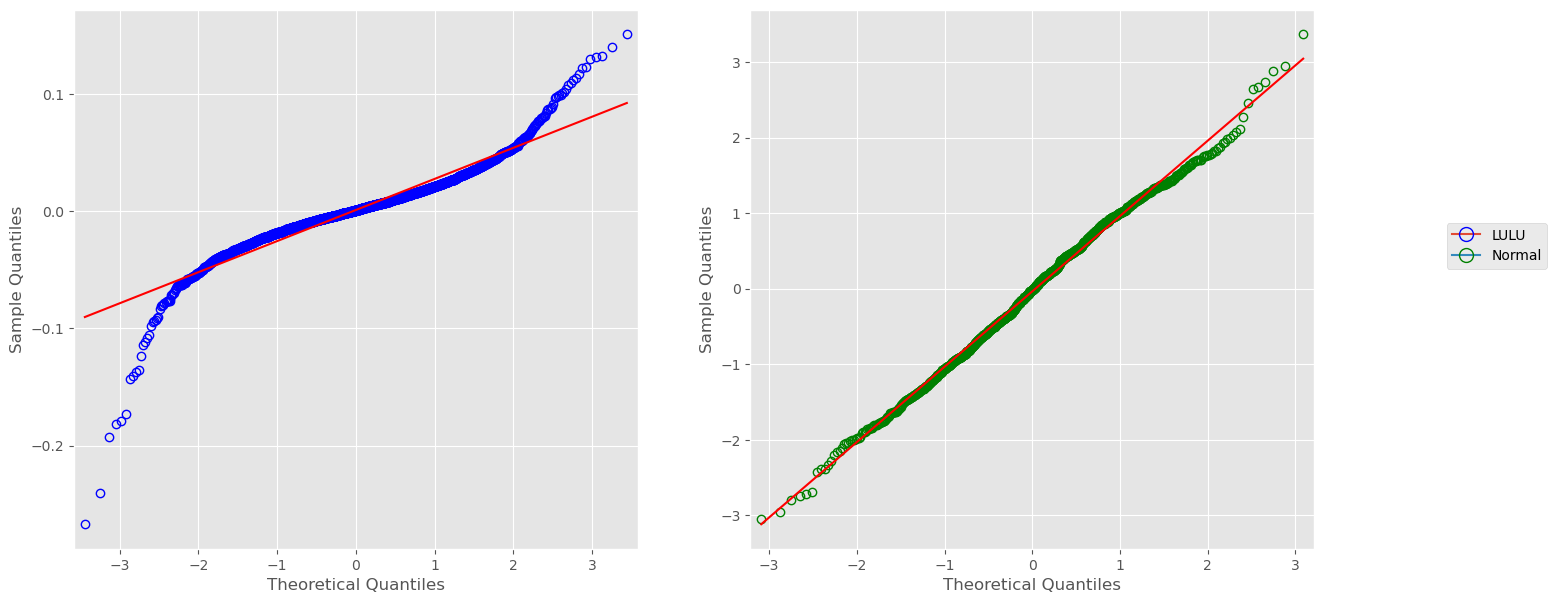

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
qqplotLULU = sm.qqplot(
    df_log_returns["LULU"],
    line="s",
    marker="o",
    markerfacecolor="none",
    markeredgecolor="blue",
    ax=ax[0],
    label="LULU",
)
qqplotNormal = sm.qqplot(
    np.random.randn(1000),
    line="s",
    marker="o",
    markerfacecolor="none",
    markeredgecolor="green",
    ax=ax[1],
)
# fig.legend(handles=[qqplotLULU, qqplotNormal], loc='lower right')

legend_handles = [
    plt.plot(
        [],
        [],
        marker="o",
        markersize=10,
        markerfacecolor="none",
        markeredgecolor="blue",
    )[0],
    plt.plot(
        [],
        [],
        marker="o",
        markersize=10,
        markerfacecolor="none",
        markeredgecolor="green",
    )[0],
]
legend_labels = ["LULU", "Normal"]
fig.legend(legend_handles, legend_labels, loc="lower right", bbox_to_anchor=(1.05, 0.5))
plt.show()